<a href="https://colab.research.google.com/github/Robertocarbonee/Finance-Physics/blob/main/BTC_and_ETH_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BTC_data_set.csv to BTC_data_set.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving ETH_data_set.csv to ETH_data_set.csv


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
btc_data = pd.read_csv('BTC_data_set.csv')
eth_data = pd.read_csv('ETH_data_set.csv')

# Remove commas and convert columns to numeric
btc_data['Open'] = pd.to_numeric(btc_data['Open'].str.replace(',', ''), errors='coerce')
btc_data['High'] = pd.to_numeric(btc_data['High'].str.replace(',', ''), errors='coerce')
btc_data['Low'] = pd.to_numeric(btc_data['Low'].str.replace(',', ''), errors='coerce')
btc_data['Close'] = pd.to_numeric(btc_data['Close'].str.replace(',', ''), errors='coerce')
btc_data['Volume'] = pd.to_numeric(btc_data['Volume'].str.replace(',', ''), errors='coerce')

eth_data['Open'] = pd.to_numeric(eth_data['Open'].str.replace(',', ''), errors='coerce')
eth_data['High'] = pd.to_numeric(eth_data['High'].str.replace(',', ''), errors='coerce')
eth_data['Low'] = pd.to_numeric(eth_data['Low'].str.replace(',', ''), errors='coerce')
eth_data['Close'] = pd.to_numeric(eth_data['Close'].str.replace(',', ''), errors='coerce')
eth_data['Volume'] = pd.to_numeric(eth_data['Volume'].str.replace(',', ''), errors='coerce')

# Drop rows with NaN values after conversion
btc_data = btc_data.dropna()
eth_data = eth_data.dropna()

# Sort by date to ensure chronological order
btc_data = btc_data.sort_values(by='Date')
eth_data = eth_data.sort_values(by='Date')

# Select relevant features for prediction
btc_features = btc_data[['Open', 'High', 'Low', 'Close', 'Volume']]
eth_features = eth_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Target variable (next day's closing price)
btc_data['Target'] = btc_data['Close'].shift(-1)
eth_data['Target'] = eth_data['Close'].shift(-1)

# Drop the last row (because it has NaN in Target after shifting)
btc_data = btc_data.dropna()
eth_data = eth_data.dropna()

# Final features and target
btc_features = btc_data[['Open', 'High', 'Low', 'Close', 'Volume']]
btc_target = btc_data['Target']
eth_features = eth_data[['Open', 'High', 'Low', 'Close', 'Volume']]
eth_target = eth_data['Target']

# Split into train and test sets
btc_X_train, btc_X_test, btc_y_train, btc_y_test = train_test_split(btc_features, btc_target, test_size=0.2, shuffle=False)
eth_X_train, eth_X_test, eth_y_train, eth_y_test = train_test_split(eth_features, eth_target, test_size=0.2, shuffle=False)

# Scale the features
scaler = MinMaxScaler()
btc_X_train = scaler.fit_transform(btc_X_train)
btc_X_test = scaler.transform(btc_X_test)
eth_X_train = scaler.fit_transform(eth_X_train)
eth_X_test = scaler.transform(eth_X_test)



In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model structure
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(5,)),  # 5 features (Open, High, Low, Close, Volume)
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Create separate models for BTC and ETH
btc_model = create_model()
eth_model = create_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Train BTC model
btc_history = btc_model.fit(btc_X_train, btc_y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Train ETH model
eth_history = eth_model.fit(eth_X_train, eth_y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1386792704.0000 - mae: 32437.8379 - val_loss: 1749457280.0000 - val_mae: 37030.5547
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1374872832.0000 - mae: 32394.8984 - val_loss: 1749364992.0000 - val_mae: 37029.1250
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1414596992.0000 - mae: 32895.6133 - val_loss: 1749033728.0000 - val_mae: 37023.9570
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1461992832.0000 - mae: 33382.6328 - val_loss: 1748112128.0000 - val_mae: 37009.5000
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1423134848.0000 - mae: 32769.9766 - val_loss: 1746049024.0000 - val_mae: 36977.0625
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1349691776.0000 - mae: 32218.8984 - val_loss: 1742080768.0000 - val_mae: 36914.5391
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1407164928.0000 - mae: 32900.3594 - val_loss: 1735191424.0000 - val_mae: 36805.6484
Epoch 

In [9]:
# Predict the next day for BTC and ETH
btc_prediction = btc_model.predict(btc_X_test[-1].reshape(1, -1))
eth_prediction = eth_model.predict(eth_X_test[-1].reshape(1, -1))

print("Predicted next day BTC closing price:", btc_prediction[0][0])
print("Predicted next day ETH closing price:", eth_prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted next day BTC closing price: 29938.447
Predicted next day ETH closing price: 2340.1038


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the regression model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(5,)),  # 5 input features
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Train BTC model
btc_model = create_model()
btc_history = btc_model.fit(btc_X_train, btc_y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Train ETH model
eth_model = create_model()
eth_history = eth_model.fit(eth_X_train, eth_y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1392653568.0000 - mae: 32499.8262 - val_loss: 1749365248.0000 - val_mae: 37029.0859
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1377356288.0000 - mae: 32293.1309 - val_loss: 1748783744.0000 - val_mae: 37019.9883
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1406063744.0000 - mae: 32671.4219 - val_loss: 1746482688.0000 - val_mae: 36983.8242
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1378684800.0000 - mae: 32415.5625 - val_loss: 1740020352.0000 - val_mae: 36881.9609
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1410455936.0000 - mae: 32851.1797 - val_loss: 1725536512.0000 - val_mae: 36652.3281
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1326840960.0000 - mae: 31762.9414 - val_loss: 1697679232.0000 - val_mae: 36205.1172
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1373083648.0000 - mae: 32300.4395 - val_loss: 1649988864.0000 - val_mae: 35421.8750
Epoch 8/50
37/37 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6185814.0000 - mae: 2332.0659 - val_loss: 6446352.0000 - val_mae: 2451.6379
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6356665.5000 - mae: 2367.3308 - val_loss: 6430717.5000 - val_mae: 2448.3477
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6187077.0000 - mae: 2336.5535 - val_loss: 6380619.5000 - val_mae: 2437.7461
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5992262.0000 - mae: 2304.8713 - val_loss: 6253643.0000 - val_mae: 2410.6343
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5789834.0000 - mae: 2249.8684 - val_loss: 5978227.5000 - val_mae: 2350.6091
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5494749.0000 - mae: 2188.1157 - val_loss: 5476654.0000 - val_mae: 2236.6440
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5148170.0000 - mae: 2094.6875 - val_loss: 4691531.5000 - val_mae: 2043.7811
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4207218.5000 - 

In [11]:
# Predict on the test set
btc_y_pred = btc_model.predict(btc_X_test)
eth_y_pred = eth_model.predict(eth_X_test)

# Evaluate BTC model
btc_mae = mean_absolute_error(btc_y_test, btc_y_pred)
btc_mse = mean_squared_error(btc_y_test, btc_y_pred)
print(f"BTC Model - MAE: {btc_mae}, MSE: {btc_mse}")

# Evaluate ETH model
eth_mae = mean_absolute_error(eth_y_test, eth_y_pred)
eth_mse = mean_squared_error(eth_y_test, eth_y_pred)
print(f"ETH Model - MAE: {eth_mae}, MSE: {eth_mse}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
BTC Model - MAE: 14008.931617571723, MSE: 323879875.53646415
ETH Model - MAE: 782.6432380518794, MSE: 929655.2616081006


In [12]:
# BTC model results
btc_results = pd.DataFrame({
    'Actual': btc_y_test.values,
    'Predicted': btc_y_pred.flatten()
})
print("BTC Model - Actual vs. Predicted:")
print(btc_results.head(10))  # Show first 10 rows

# ETH model results
eth_results = pd.DataFrame({
    'Actual': eth_y_test.values,
    'Predicted': eth_y_pred.flatten()
})
print("ETH Model - Actual vs. Predicted:")
print(eth_results.head(10))  # Show first 10 rows


BTC Model - Actual vs. Predicted:
     Actual     Predicted
0  38332.61  29783.062500
1  23198.13  32539.355469
2  51571.10  35730.289062
3   9341.71  21039.625000
4  47093.85  44825.292969
5  39214.22  28409.869141
6  23175.38  28610.851562
7  51733.24  34208.394531
8   8820.52  20844.511719
9  46339.76  46306.894531
ETH Model - Actual vs. Predicted:
    Actual    Predicted
0  1643.23  2277.846680
1  2971.01  2424.381836
2  1570.20  2224.231934
3  2590.36  2303.766846
4  1651.07  2280.696045
5  2921.66  2424.532471
6  1626.58  2242.006348
7  2598.07  2367.879395
8  1608.37  2243.617188
9  2992.39  2427.139648


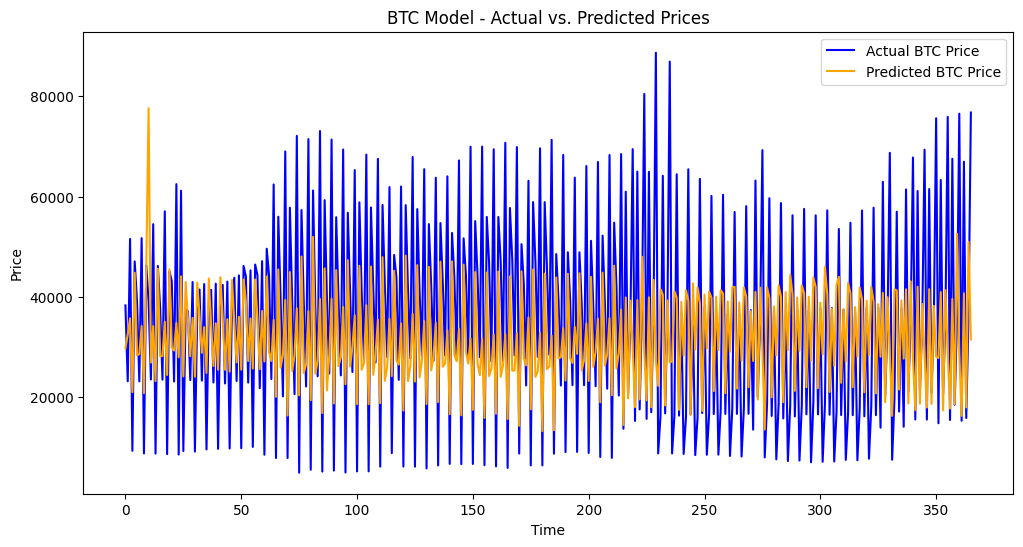

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(btc_y_test.values, label='Actual BTC Price', color='blue')
plt.plot(btc_y_pred.flatten(), label='Predicted BTC Price', color='orange')
plt.title('BTC Model - Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


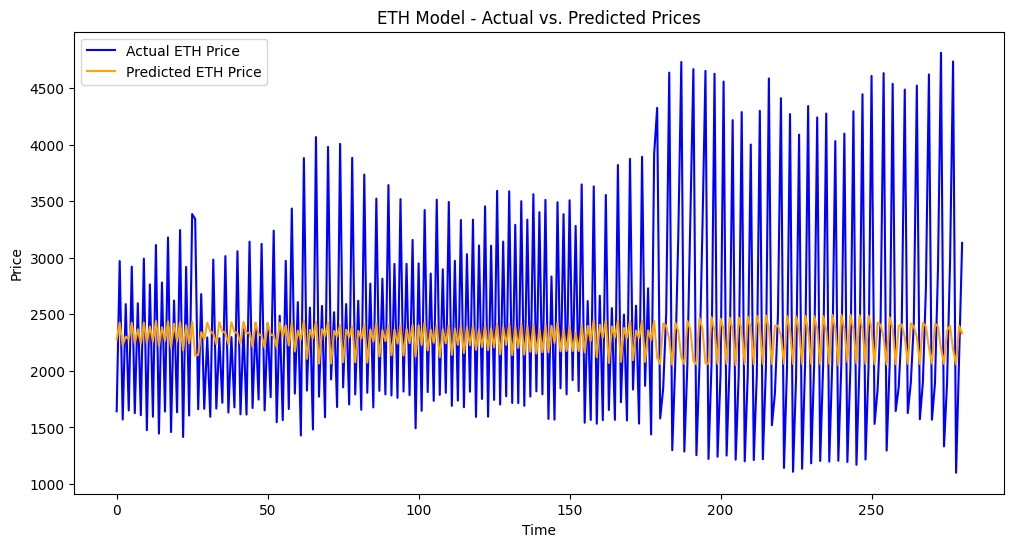

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(eth_y_test.values, label='Actual ETH Price', color='blue')
plt.plot(eth_y_pred.flatten(), label='Predicted ETH Price', color='orange')
plt.title('ETH Model - Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
